In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Deck: room**

**Embarked: the port where a passenger boarded the ship**

**fare: ticket price**

**PClass: passenger class**

**Sibsip: The number of siblings or spouses aboard the Titanic**

**Parsh: epresents the number of parents or children a passenger had on boar**

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [6]:
df.drop(['deck'],axis=1,inplace=True)

In [7]:
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


**1 - We can remove the embarked_town columns as the same as embarked**

**2 - We can combine the following 2 cols [sibsp, parsh] in one col we can name it [companions or family members]**

In [8]:
df.drop(['embark_town'],axis=1,inplace=True)

In [9]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.drop(['sibsp','parch','alone'],axis=1,inplace=True)

In [10]:
df.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,alive,family_size
0,0,3,male,22.0,7.2500,S,Third,man,True,no,2
1,1,1,female,38.0,71.2833,C,First,woman,False,yes,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,yes,1
3,1,1,female,35.0,53.1000,S,First,woman,False,yes,2
4,0,3,male,35.0,8.0500,S,Third,man,True,no,1


## Visualization

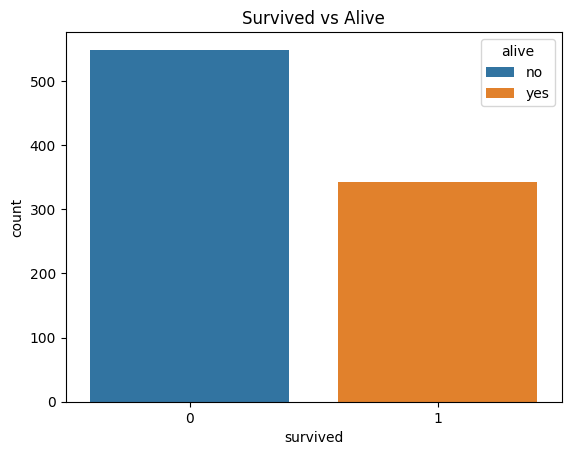

In [11]:
sns.countplot(data=df, x='survived', hue='alive')
plt.title('Survived vs Alive')
plt.show()


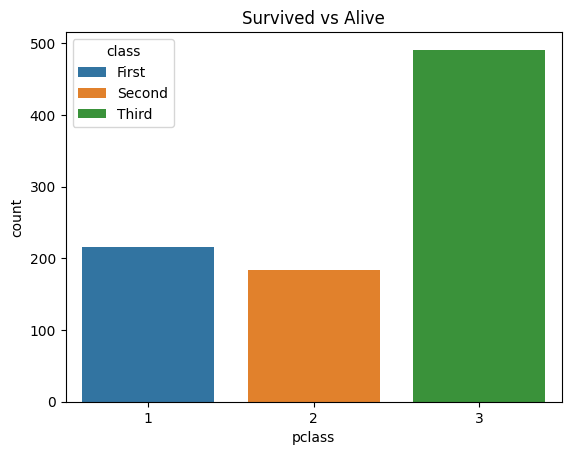

In [12]:
sns.countplot(data=df, x='pclass', hue='class')
plt.title('Survived vs Alive')
plt.show()


**Since Pclass and class have the same meaning we can drop Class**

In [13]:
df.drop(['class'],axis=1,inplace=True)

**This mean that every survived is alive and every non survived is not alive, they have the same meaninig so we can drop Alive column**

In [14]:
df.drop(['alive'],axis=1,inplace=True)

In [15]:
df.describe()

,survived,pclass,age,fare,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602
std,0.486592,0.836071,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


### Boxplot

In [16]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='O').columns

print(num_cols)
print(cat_cols)

Index(['survived', 'pclass', 'age', 'fare', 'family_size'], dtype='object')
Index(['sex', 'embarked', 'who'], dtype='object')


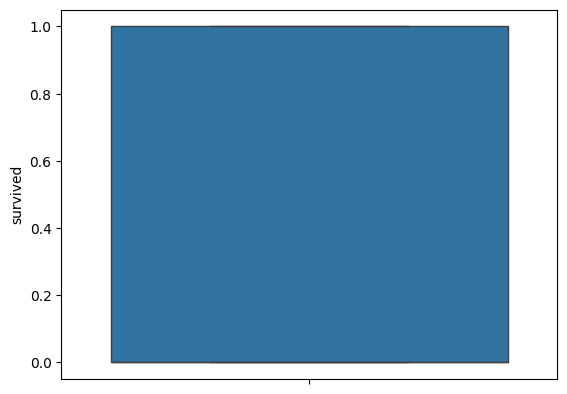

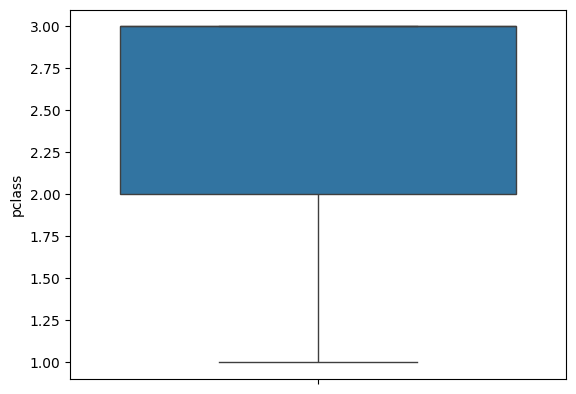

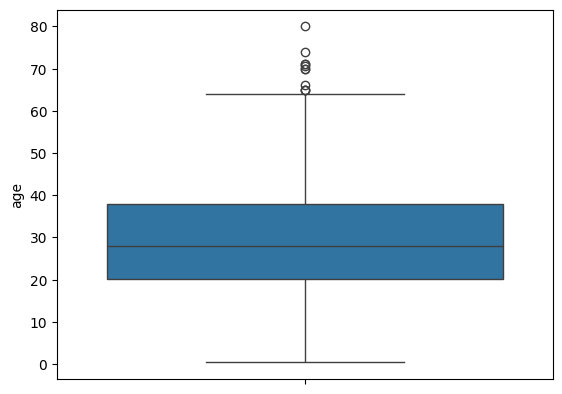

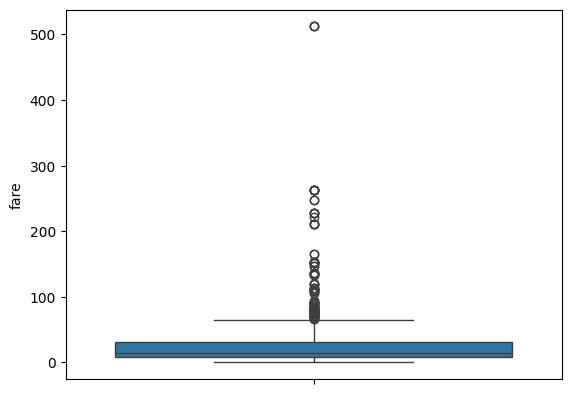

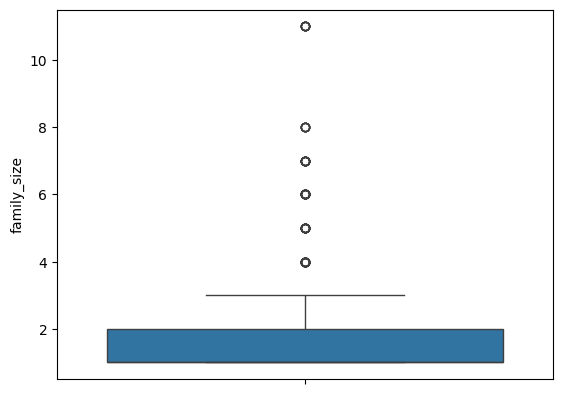

In [17]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

**Outliers in family_size, fare, age**

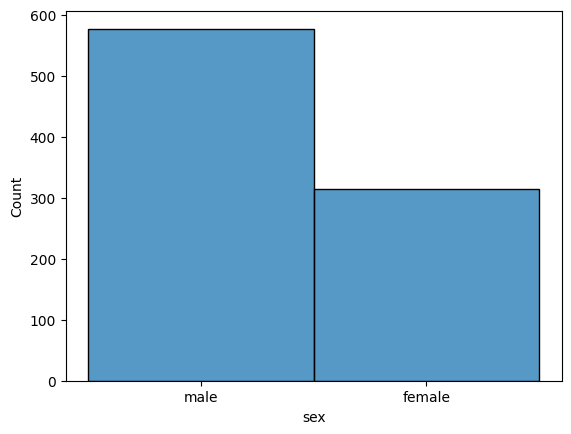

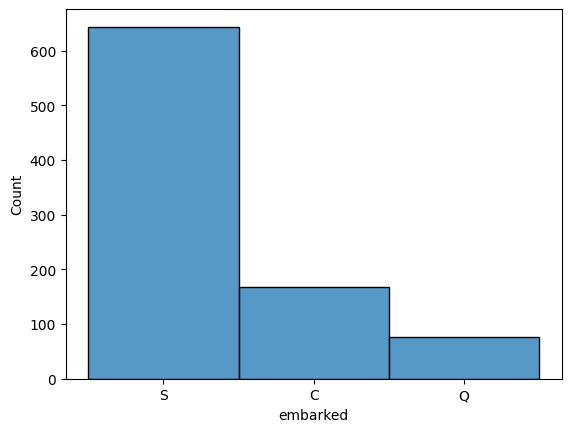

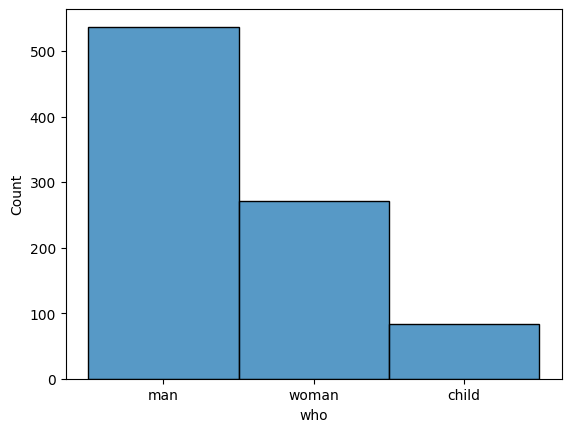

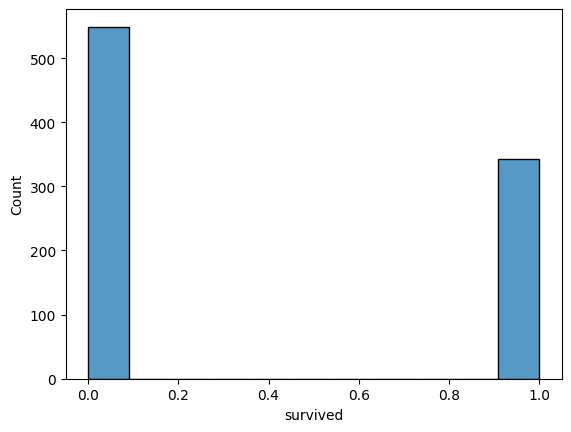

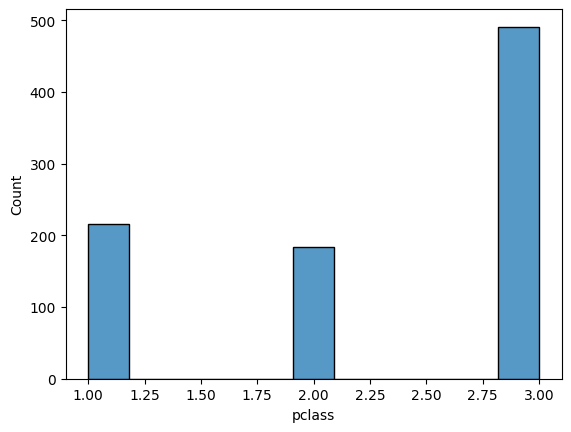

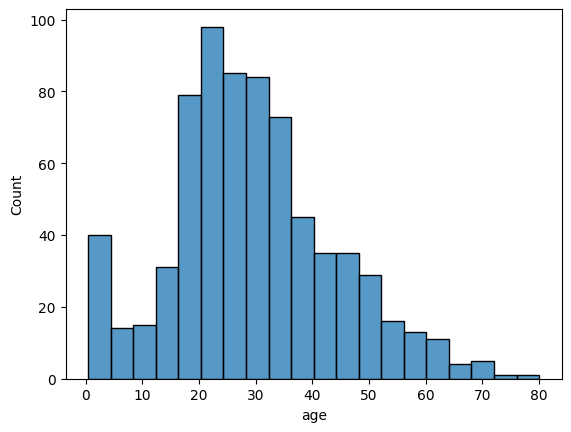

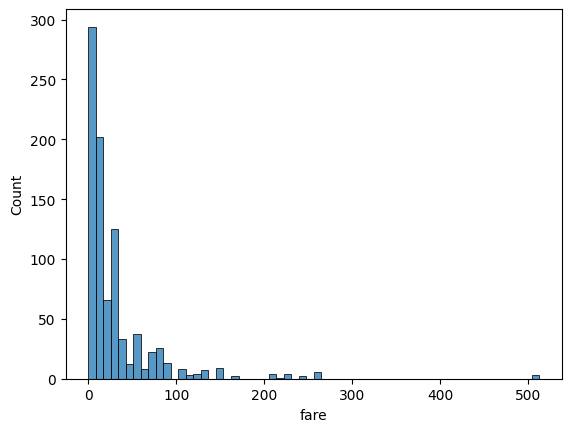

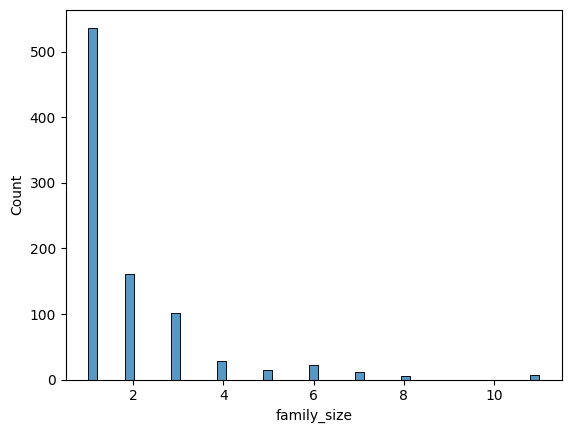

In [18]:
for col in cat_cols:
    sns.histplot(df[col])
    plt.show()

for col in num_cols:
    sns.histplot(df[col])
    plt.show()

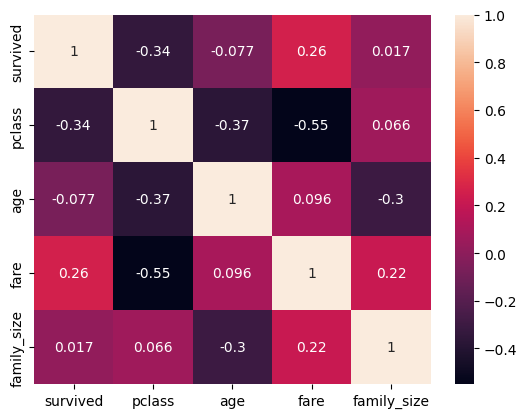

In [19]:
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

# Pipelining

**Data splitting**

In [20]:
x = df.drop(['survived'],axis=1)
y = df['survived']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
num_cols = x.select_dtypes(include='number').columns
nom_cols = x.select_dtypes(include=['object', 'category']).columns

print(num_cols)
print(nom_cols)

Index(['pclass', 'age', 'fare', 'family_size'], dtype='object')
Index(['sex', 'embarked', 'who'], dtype='object')


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


num_pipeLine = Pipeline([
    ('num_imputer',SimpleImputer(strategy='most_frequent')),
    ('poly',PolynomialFeatures()),
    ('num_scaler',StandardScaler())
])

nom_pipeLine = Pipeline([
    ('ohe_imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num_pipeLine',num_pipeLine,num_cols),
    ('nom_pipeLine',nom_pipeLine,nom_cols)
])

In [24]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

# Modelling

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

model.fit(x_train_prep, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test_prep)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



## Enhance the model by HyperParameter tunning and by Cross Validation

In [27]:
from sklearn.model_selection import GridSearchCV
LogisticRegressionPipeLine = Pipeline([('pre', preprocessor), ('clf', LogisticRegression())])

param_grid = [
    {
        'clf__solver': ['lbfgs', 'newton-cg'],
        'clf__penalty': ['l2'],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 1500, 2000]
    },
    {
        'clf__solver': ['liblinear'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 1500, 2000]
    },
    {
        'clf__solver': ['saga'],
        'clf__penalty': ['l1', 'l2', 'elasticnet'],
        'clf__C': [0.1, 1, 10],
        'clf__l1_ratio': [0.2, 0.5],
        'clf__max_iter': [1000, 1500, 2000]
    }
]


grid = GridSearchCV(LogisticRegressionPipeLine, param_grid, cv=5, scoring='roc_auc')
grid.fit(x_train, y_train)


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packag

,estimator,Pipeline(step...egression())])
,param_grid,"[{'clf__C': [0.1, 1, ...], 'clf__max_iter': [1000, 1500, ...], 'clf__penalty': ['l2'], 'clf__solver': ['lbfgs', 'newton-cg']}, {'clf__C': [0.1, 1, ...], 'clf__max_iter': [1000, 1500, ...], 'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear']}, ...]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_pipeLine', ...), ('nom_pipeLine', ...)]"


In [28]:
grid.best_params_

{'clf__C': 10,
 'clf__max_iter': 1000,
 'clf__penalty': 'l1',
 'clf__solver': 'liblinear'}

In [29]:
grid.best_score_

np.float64(0.859066800433135)

In [30]:
grid.best_estimator_

,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipeLine', ...), ('nom_pipeLine', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Save model

In [31]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(grid.best_estimator_, f)